                                                            Ensemble Learning                                                   

# Ensemble Learning

Ensemble learning is a method where we use many small models instead of just one. Each of these models may not be very strong on its own, but when we put their results together, we get a better and more accurate answer. It's like asking a group of people for advice instead of just one person—each one might be a little wrong, but together, they usually give a better answer.


![alt text](ensemble_learning_.webp)


Types of Ensembles Learning in Machine Learning
There are three main types of ensemble methods:

* **Bagging (Bootstrap Aggregating):** Models are trained independently on different random subsets of the training data. Their results are then combined—usually by averaging (for regression) or voting (for classification). This helps reduce variance and prevents overfitting.
* **Boosting:** Models are trained one after another. Each new model focuses on fixing the errors made by the previous ones. The final prediction is a weighted combination of all models, which helps reduce bias and improve accuracy.
* **Stacking (Stacked Generalization):** Multiple different models (often of different types) are trained and their predictions are used as inputs to a final model, called a meta-model. The meta-model learns how to best combine the predictions of the base models, aiming for better performance than any individual model.

## 1. Bagging Algorithm

Bagging classifier can be used for both regression and classification tasks. Here is an overview of Bagging classifier algorithm:

* **Bootstrap Sampling:** Divides the original training data into ‘N’ subsets and randomly selects a subset with replacement in some rows from other subsets. This step ensures that the base models are trained on diverse subsets of the data and there is no class imbalance.
* **Base Model Training:** For each bootstrapped sample we train a base model independently on that subset of data. These weak models are trained in parallel to increase computational efficiency and reduce time consumption. We can use different base learners i.e. different ML models as base learners to bring variety and robustness.
* **Prediction Aggregation:** To make a prediction on testing data combine the predictions of all base models. For classification tasks it can include majority voting or weighted majority while for regression it involves averaging the predictions.
* **Out-of-Bag (OOB) Evaluation:** Some samples are excluded from the training subset of particular base models during the bootstrapping method. These “out-of-bag” samples can be used to estimate the model’s performance without the need for cross-validation.
* **Final Prediction:** After aggregating the predictions from all the base models, Bagging produces a final prediction for each instance.

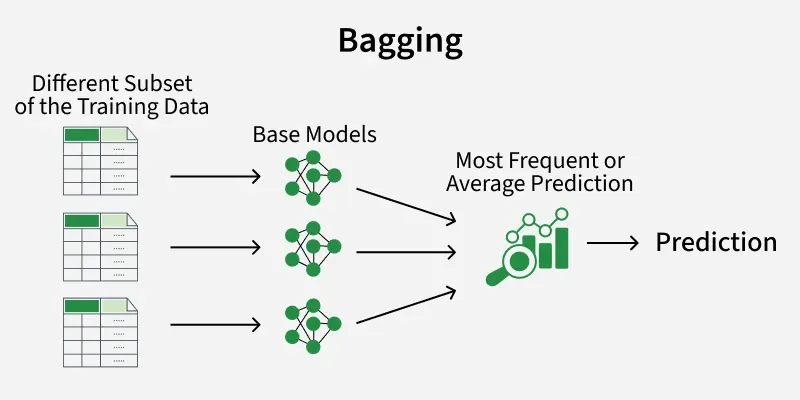

## Python pseudo code for Bagging Estimator implementing libraries:

#### 1. Import necessary libraries


In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### 2. Loading and Splitting the Iris Dataset

In [2]:
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3. Creating a Base Classifier


In [3]:
base_classifier = DecisionTreeClassifier()

#### 4. Creating and Training the Bagging Classifier

In [4]:
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

#### 5. Making Predictions and Evaluating Accuracy

In [5]:
y_pred = bagging_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# 2. Boosting Algorithm

Boosting is an ensemble technique that combines multiple weak learners to create a strong learner. Weak models are trained in series such that each next model tries to correct errors of the previous model until the entire training dataset is predicted correctly. One of the most well-known boosting algorithms is AdaBoost (Adaptive Boosting). Here is an overview of Boosting algorithm:

* **Initialize Model Weights:** Begin with a single weak learner and assign equal weights to all training examples.
* **Train Weak Learner:** Train weak learners on these dataset.
* **Sequential Learning:** Boosting works by training models sequentially where each model focuses on correcting the errors of its predecessor. Boosting typically uses a single type of weak learner like decision trees.
* **Weight Adjustment:** Boosting assigns weights to training datapoints. Misclassified examples receive higher weights in the next iteration so that next models pay more attention to them.

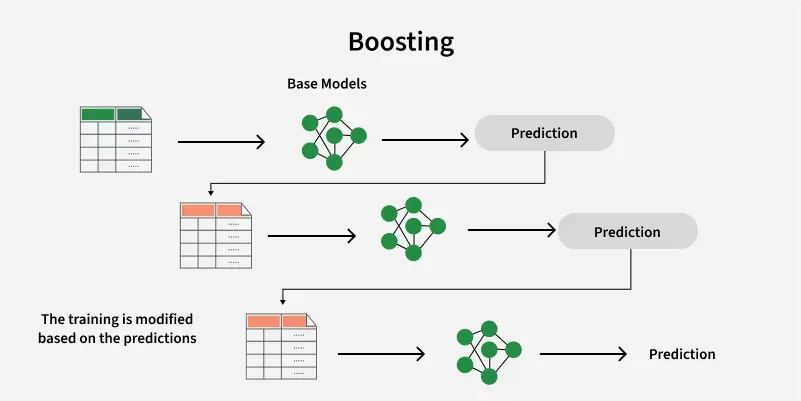

## Python pseudo code for boosting Estimator implementing libraries:

#### 1. Import necessary libraries

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### 2. Loading and Splitting the Dataset

In [7]:
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3. Defining the Weak Learner

In [8]:
base_classifier = DecisionTreeClassifier(max_depth=1)

#### 4. Creating and Training the AdaBoost Classifier

* base_classifier: The weak learner used in boosting.
* n_estimators = 50: Number of weak learners to train sequentially.
* learning_rate = 1.0: Controls the contribution of each weak learner to the final model.
* random_state = 42: Ensures reproducibility.





In [9]:
adaboost_classifier = AdaBoostClassifier(
    base_classifier, n_estimators=50, learning_rate=1.0, random_state=42
)
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

#### 5. Making Predictions and Calculating Accuracy

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


## Stacking

Stacking (Stacked Generalization) combines multiple models (base learners) of different types, where each model makes independent predictions and a meta-model is trained to combine these predictions. Instead of simply averaging or voting, as in bagging and boosting, stacking trains a higher-level model (meta-model) to learn how to best combine the predictions of the base models.

In stacking, the base models are trained on the original data and their predictions are then used as features for the meta-model, which learns how to combine them effectively. The final prediction is made by the meta-model based on the combined outputs of all the base models.

The final prediction from the ensemble is typically made by:

* Meta-model: A model that learns how to combine the predictions of the base models to generate the final output.

#### Common Algorithms Using Stacking

**1. Generalized Stacking**

In Generalized Stacking, multiple different models (e.g., decision trees, logistic regression, neural networks) are trained on the same dataset.
And a meta-model (such as a logistic regression or another decision tree) is trained on the predictions made by th andese base models.
The meta-model learns how to combine the predictions of the base models to make the final prediction.

**2. Stacking with Cross-Validation**

In stacking with cross-validation, the base models are trained using cross-validation and their predictions on the validation set are used to train the meta-model.
This prevents overfitting and ensures that the meta-model is trained on unbiased data.
**3. Multi-Layer Stacking**
Multi-layer stacking involves multiple levels of base models, where the outputs of the first level of models are fed into a second level of base models and so on, before reaching the meta-model.
This approach creates a more complex ensemble that can capture a wider variety of patterns in the data.